In [1]:
#import tdt
import matplotlib.pyplot as plt
import trompy as tp
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
with open('C://Data//hislight_pickles//restricted_dark.pickle', 'rb') as handle:
    restricted_dark = pickle.load(handle)

In [3]:
mice_to_exclude = []

In [4]:
run_length = []
run_licks  = []

snips_start= []
snips_end= []
    
kwargs={"bins":300, "trial_length":30, "baseline_length":5}    
    
for key, val in restricted_dark.items():
    if val["mouse_ID"] not in mice_to_exclude:
        lickdata= tp.lickCalc(val["licks"], minrunlength=3)
        
        run_length.append(lickdata["rTime"])
        run_licks.append(lickdata["rLicks"])
       
        snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
        snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])
        

run_length = tp.flatten_list(run_length)
run_licks = tp.flatten_list(run_licks)

snips_start = np.vstack(snips_start)
snips_end = np.vstack(snips_end)

In [5]:
AUC_start = np.trapz(snips_start[:,50:])
AUC_end = np.trapz(snips_end[:,50:])

Text(0.5, 1.0, 'run end')

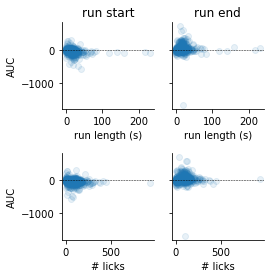

In [9]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[4,4],
                                        gridspec_kw={"width_ratios":[1,1], "left":0.2, "hspace":0.5},
                                       sharey=True)


ax1.scatter(run_length, AUC_start, alpha=0.1)
ax3.scatter(run_licks, AUC_start, alpha=0.1)

ax2.scatter(run_length, AUC_end, alpha=0.1)
ax4.scatter(run_licks, AUC_end, alpha=0.1)

ax1.axhline(0, color="black", linestyle="--", linewidth=0.5)
ax2.axhline(0, color="black", linestyle="--", linewidth=0.5)
ax3.axhline(0, color="black", linestyle="--", linewidth=0.5)
ax4.axhline(0, color="black", linestyle="--", linewidth=0.5)

ax1.set_xlabel("run length (s)")
ax3.set_xlabel("# licks")
ax2.set_xlabel("run length (s)")
ax4.set_xlabel("# licks")

ax1.set_ylabel("AUC")
ax3.set_ylabel("AUC")
#ax2.set_ylabel("AUC")
#ax4.set_ylabel("AUC")

for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax1.set_title("run start")
ax2.set_title("run end")



#f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\grouped_runs_vs_AUC.pdf")

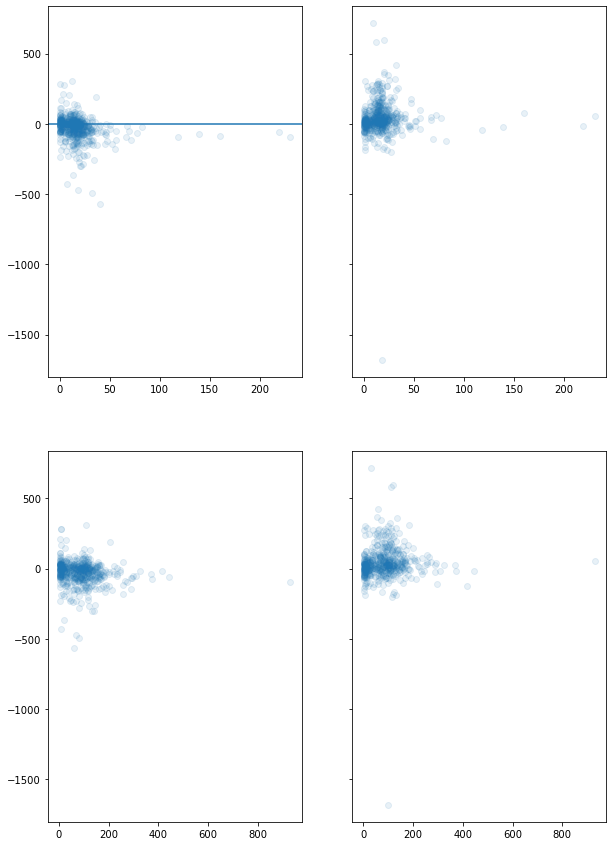

In [6]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[10,15],
                                        gridspec_kw={"width_ratios":[1,1]},
                                       sharey=True)

ax1.scatter(run_length, AUC_start, alpha=0.1)
ax3.scatter(run_licks, AUC_start, alpha=0.1)

ax2.scatter(run_length, AUC_end, alpha=0.1)
ax4.scatter(run_licks, AUC_end, alpha=0.1)

ax1.axhline(0)